Importations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Functions - grads - projections

In [2]:
def h(x, y, kappa):
    return x**2 + 0.5 * kappa * y**2


def grad_h(x, y, kappa):
    return np.array([x, kappa * y])


def project(point, a, b, c):
    x0, y0 = point
    denom = a**2 + b**2
    if denom == 0:
        raise ValueError("Invalid line parameters: a^2 + b^2 must be non-zero")

    x_proj = x0 - a * (a * x0 + b * y0 + c) / denom
    y_proj = y0 - b * (a * x0 + b * y0 + c) / denom
    return np.array([x_proj, y_proj])


def projection_K(x, y):
    return np.array([(1 - y) / 2, (1 - x) / 2])


def DGPFK(f, grad_f, PK, X0, beta, N, epsilon, kappa):
    X = X0
    history = [X]
    for i in range(N):
        grad = grad_f(X[0], X[1], kappa)
        X_new = X - beta * grad
        X_new = PK(X_new)
        history.append(X_new)
        if np.linalg.norm(X_new - X) < epsilon:
            print(i)
            break
        X = X_new
    return X, np.array(history)

Applications

36
Optimal point: [0.8333351 0.1666649]


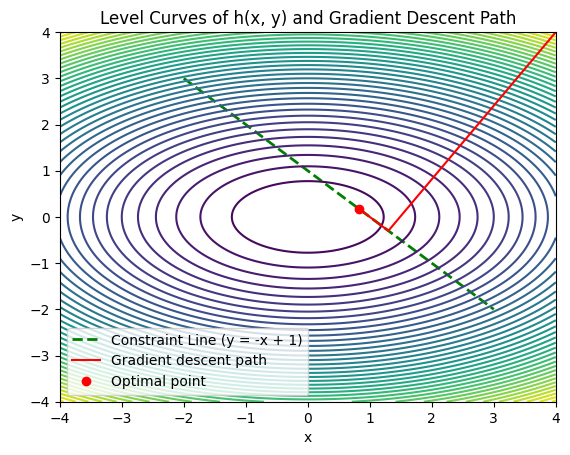

In [3]:
X0 = np.array([4, 4])  # Initial point
beta = 0.1  # Step size
N = 1000  # Max iterations
epsilon = 1e-6
kappa = 5

a, b, c = 1, 1, -1
project_function = lambda point: project(point, a, b, c)

X_opt, history = DGPFK(h, grad_h, project_function, X0, beta, N, epsilon, kappa)
print("Optimal point:", X_opt)

x_vals = np.linspace(-4, 4, 400)
y_vals = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = h(X, Y, kappa)


line_x = np.linspace(-2, 3, 100)
line_y = -line_x + 1
plt.plot(
    line_x,
    line_y,
    label="Constraint Line (y = -x + 1)",
    color="green",
    linestyle="--",
    linewidth=2,
)


plt.contour(X, Y, Z, 50, cmap="viridis")
history_x = history[:, 0]
history_y = history[:, 1]
plt.plot(history_x, history_y, "r-", label="Gradient descent path")
plt.plot(X_opt[0], X_opt[1], "ro", label="Optimal point")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Level Curves of h(x, y) and Gradient Descent Path")
plt.legend()
plt.show()
